In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import glob
import cv2

from calibration import read_calibration, undistort_image
from color_and_gradient import pipeline

In [2]:
def imshow_arr(images):
    plt.figure()
    plt.rcParams["figure.figsize"] = (20,10)
    fig, axs = plt.subplots(1, len(images))
    for i in range(len(images)):
        if len(images[i].shape) == 2:
            axs[i].imshow(np.dstack((images[i], images[i], images[i]))*255)
        else:
            axs[i].imshow(images[i])
    

In [3]:
straight_imgs = glob.glob("test_images/straight_lines*.jpg")

images = []
m = read_calibration("intrinsics.yaml")
for image in straight_imgs:
    img = mpimg.imread(image)
    img_rect = undistort_image(img, m)
    images.append(img)
    
h, w = images[0].shape[:2]
print(w,h)

1280 720


In [4]:
# Tune src ROI manually
src = np.int32([[w/6 - 10, h], [w*5/6 + 50, h], 
                [w/2 + 56, h/2 + 100], [w/2 - 55, h/2 + 100]])
dst = np.int32([[w/5, h], [w*4/5, h], 
                [w*4/5, 0], [w/5, 0]])

In [5]:
print(src)
print(dst)

[[ 203  720]
 [1116  720]
 [ 696  460]
 [ 585  460]]
[[ 256  720]
 [1024  720]
 [1024    0]
 [ 256    0]]


<Figure size 1440x720 with 0 Axes>

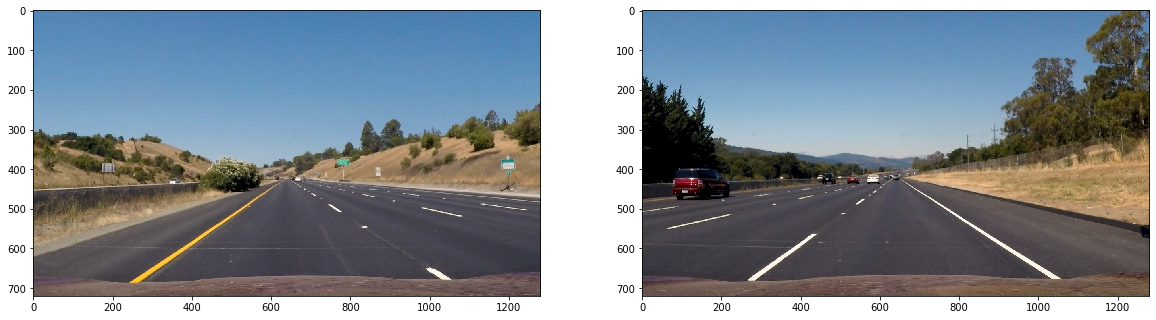

In [6]:
#for i in range(len(images)):
#    cv2.polylines(images[i],[src],True,(255,0,255), 5)
    
plt.rcParams["figure.figsize"] = (20,10)
plt.figure()
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(images[0])
ax2.imshow(images[1])

In [7]:
M = cv2.getPerspectiveTransform(np.array(src, dtype=np.float32),np.array(dst, dtype=np.float32))

<Figure size 1440x720 with 0 Axes>

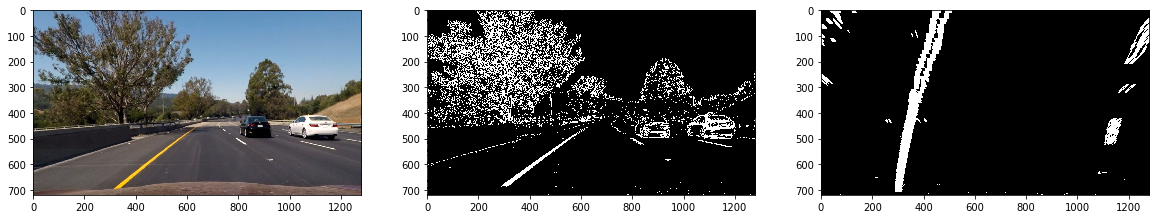

<Figure size 1440x720 with 0 Axes>

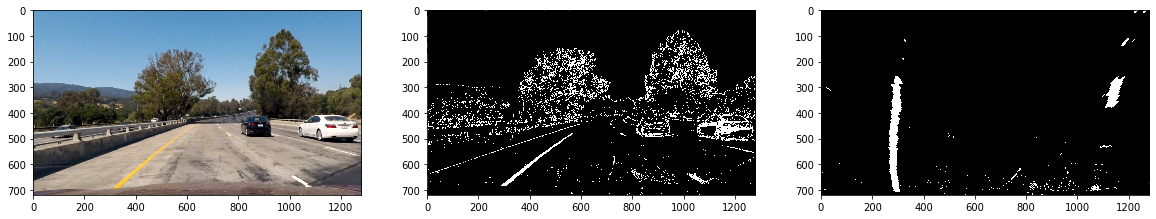

<Figure size 1440x720 with 0 Axes>

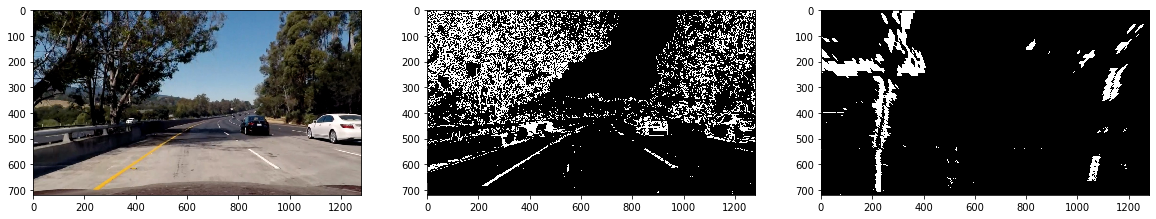

<Figure size 1440x720 with 0 Axes>

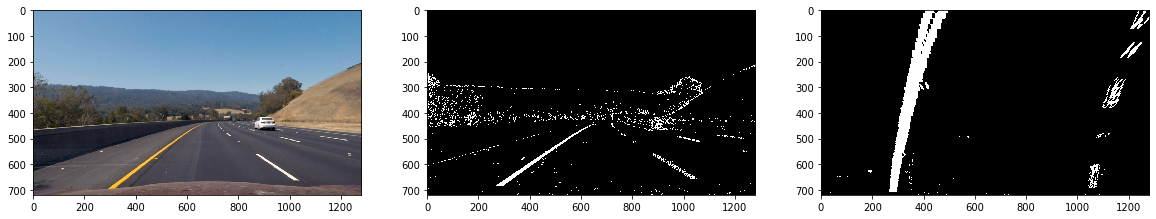

<Figure size 1440x720 with 0 Axes>

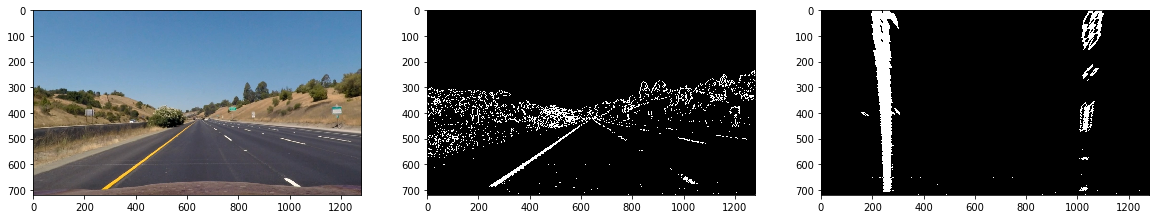

<Figure size 1440x720 with 0 Axes>

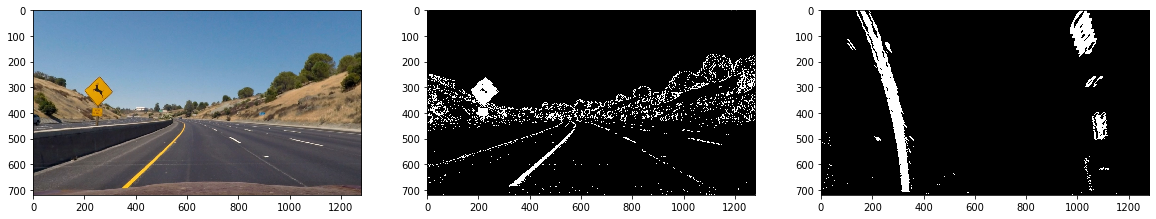

<Figure size 1440x720 with 0 Axes>

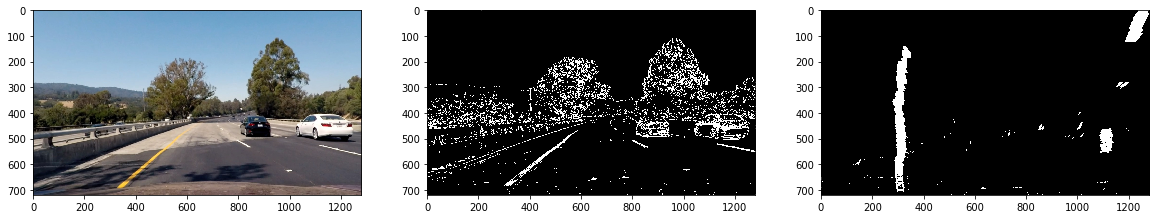

<Figure size 1440x720 with 0 Axes>

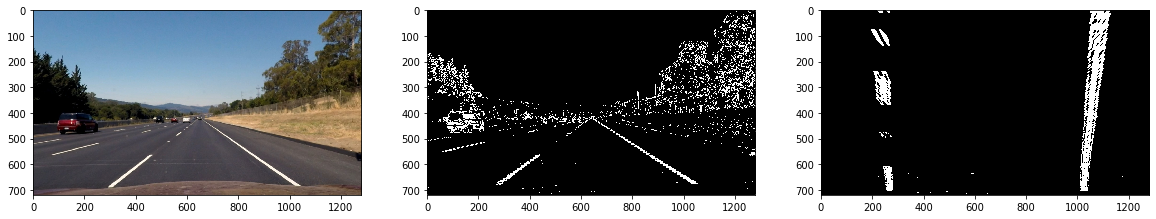

In [8]:

for image in glob.glob("test_images/*.jpg"):
    #cv2.polylines(images[i],[src],True,(255,0,255), 5)
    img = mpimg.imread(image)
    img_size = (img.shape[1], img.shape[0])
    img_rect = undistort_image(img, m)
    img_thresh = pipeline(img)
    img_warped = cv2.warpPerspective(img_thresh, M, img_size, flags=cv2.INTER_LINEAR)
    imshow_arr([img_rect, img_thresh, img_warped])